In [1]:
#%pip install langchain_coummunity

In [2]:

from langchain_community.tools import ArxivQueryRun, WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper, ArxivAPIWrapper

In [3]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv, description="Query arxiv papers")
print(arxiv.name)

arxiv


In [4]:
arxiv.invoke("Attention is all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

In [5]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
print(wiki.name)

wikipedia


In [6]:
arxiv.invoke("What is the latest research on quantum computing?")

'Published: 2023-05-23\nTitle: Fast and energy-efficient non-volatile III-V-on-silicon photonic phase shifter based on memristors\nAuthors: Zhuoran Fang, Bassem Tossoun, Antoine Descos, Di Liang, Xue Huang, Geza Kurczveil, Arka Majumdar, Raymond G. Beausoleil\nSummary: Silicon photonics has evolved from lab research to commercial products in the\npast decade as it plays an increasingly crucial role in data communication for\nnext-generation data centers and high performance computing1. Recently,\nprogr'

In [7]:
# api_wrapper_wikipedia=WikipediaAPIWrapper(top_k_results=5,doc_content_chars_max=500)
# wikipedia=WikipediaQueryRun(api_wrapper=api_wrapper_wikipedia)
# print(wikipedia.name)

In [8]:
from dotenv import load_dotenv
import os
load_dotenv()

os.environ["TAVILY_API_KEY"] = os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [9]:
##Tavily search tools
from langchain_community.tools.tavily_search import TavilySearchResults
tavily = TavilySearchResults()


In [10]:
tavily.invoke("What is the latest news on AI tool?")

[{'title': 'Artificial Intelligence - Latest AI News and Analysis - WSJ.com',
  'url': 'https://www.wsj.com/tech/ai',
  'content': 'The latest artificial intelligence news coverage focusing on the technology, tools and the companies building AI technology.',
  'score': 0.6829338},
 {'title': 'The Latest AI and Machine Learning News - Future Tools',
  'url': 'https://www.futuretools.io/news',
  'content': 'The latest news, updated daily, from the world of artificial intelligence, machine learning, and future tech.',
  'score': 0.6599319},
 {'title': 'Artificial intelligence - NBC News',
  'url': 'https://www.nbcnews.com/artificial-intelligence',
  'content': "Profile\n\nSections\n\nLocal\n\ntv\n\nFeatured\n\nMore From NBC\n\nFollow NBC News\n\nnews Alerts\n\nThere are no new alerts at this time\n\nARTIFICIAL INTELLIGENCE\n\nThe latest news and top stories on artificial intelligence, including ChatGPT, AI Chatbot and Bard.\n\nJosh Gottheimer uses AI in anti-Trump ad for the New Jersey go

In [11]:
#Created 3 tools arxiv, wikipedia, and tavily 
#Now combining all 3 tools in List. So integrating the LLM 
tools = [arxiv, wiki, tavily]

In [12]:
from langchain_groq import ChatGroq
llm=ChatGroq(model="qwen-qwq-32b")

In [13]:
llm.invoke("What is AI")

AIMessage(content='\n<think>\nOkay, the user is asking "What is AI?" So I need to explain AI in simple terms. Let me start by defining AI as a branch of computer science. I should mention that it\'s about creating systems that can perform tasks that typically require human intelligence. Then, maybe break it down into key concepts like machine learning, deep learning, and neural networks. I should also touch on common applications like voice assistants, recommendation systems, and self-driving cars to make it relatable. Oh, right, the two main types: narrow or general AI. Wait, maybe I should explain the difference between narrow (like Siri) and general AI (which doesn\'t exist yet). Also, important to mention how AI learns from data. Maybe include some examples of technologies involved, like natural language processing and computer vision. Should I also mention ethical considerations? The user might not have asked for that, but it\'s part of the broader picture. Let me structure it ste

In [14]:
#integrating the tools with LLM
llm_with_tools=llm.bind_tools(tools=tools)

In [ ]:
#execute the LLM with tools
llm_with_tools.invoke("What is the latest research on AI tool?")
#AI Assistant is ready now can create entrie application in Langraph.Langgraph do specific tasks like search, summarize, and generate text.

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_ehmm', 'function': {'arguments': '{"query": "latest AI tools research"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 160, 'prompt_tokens': 357, 'total_tokens': 517, 'completion_time': 0.395833243, 'prompt_time': 0.027574848, 'queue_time': 0.253909771, 'total_time': 0.423408091}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_fbb7e6cc39', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-c04e73f1-e3fc-4d6b-a828-a35f8b1e3a3f-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'latest AI tools research'}, 'id': 'call_ehmm', 'type': 'tool_call'}], usage_metadata={'input_tokens': 357, 'output_tokens': 160, 'total_tokens': 517})

In [16]:
llm_with_tools.invoke("What is the latest research on quantum computing?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_yzt7', 'function': {'arguments': '{"query": "quantum computing"}', 'name': 'arxiv'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 140, 'prompt_tokens': 357, 'total_tokens': 497, 'completion_time': 0.345506629, 'prompt_time': 0.037663811, 'queue_time': 0.7564323589999999, 'total_time': 0.38317044}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_512a3da6bb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-0f28f5e2-a255-4654-ab9f-c728415b0dc1-0', tool_calls=[{'name': 'arxiv', 'args': {'query': 'quantum computing'}, 'id': 'call_yzt7', 'type': 'tool_call'}], usage_metadata={'input_tokens': 357, 'output_tokens': 140, 'total_tokens': 497})

In [17]:
llm_with_tools.invoke("What is Machine Learning?")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_4q2q', 'function': {'arguments': '{"query": "Machine Learning"}', 'name': 'wikipedia'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 484, 'prompt_tokens': 353, 'total_tokens': 837, 'completion_time': 1.21617745, 'prompt_time': 0.046505527, 'queue_time': 0.25059775300000003, 'total_time': 1.2626829769999999}, 'model_name': 'qwen-qwq-32b', 'system_fingerprint': 'fp_a91d9c2cfb', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-e08b0646-7d79-4e32-b0c5-3460bbfd6b06-0', tool_calls=[{'name': 'wikipedia', 'args': {'query': 'Machine Learning'}, 'id': 'call_4q2q', 'type': 'tool_call'}], usage_metadata={'input_tokens': 353, 'output_tokens': 484, 'total_tokens': 837})

In [18]:
#wrokflow
#Stateschema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage #Human messages or Ai messages
from typing import Annotated #labelling 
from langgraph.graph.message import add_messages #reduces in langgraph 


In [19]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages] #list of messages


In [20]:
#Entire Chatbot with Langgraph 
from IPython.display import Image, display 
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition #TOOLS_CONDITION -->LLM calling tool 



In [21]:
%pip install pyppeteer


Note: you may need to restart the kernel to use updated packages.


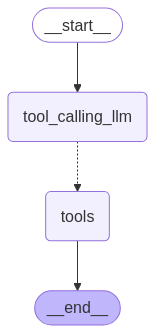

In [22]:
#coreect cde
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage, HumanMessage
from typing import Annotated
from langgraph.graph.message import add_messages
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition
from IPython.display import Image, display

# 1. State schema
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

# 2. Node function
def tool_calling_llm(state: State):
    response = llm_with_tools.invoke(state["messages"])  # llm with tools
    return {"messages": state["messages"] + [response]}  # add to existing messages

# 3. Build the graph
builder = StateGraph(State)

# 4. Nodes
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

# 5. Edges
builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm", 
    tools_condition,  # if tool is needed → tools node
)
builder.add_edge("tool_calling_llm", END)  # if no tool needed → end directly
builder.add_edge("tools", END)  # after tool usage → end

# 6. Compile
graph = builder.compile()

# 7. Display the graph
display(Image(graph.get_graph().draw_mermaid_png()))


In [23]:
messages=graph.invoke({"messages":"1706.03762"})
for m in messages['messages']:
     m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (call_qc3a)
 Call ID: call_qc3a
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base


In [24]:
messages=graph.invoke({"messages":"Hi, My name is sayiqa"})
for m in messages['messages']:
     m.pretty_print()

================================ Human Message =================================

Hi, My name is sayiqa
================================== Ai Message ==================================

Hello Sayiqa! I'm Qwen, a large language model developed by Alibaba Cloud. How can I assist you today? Feel free to ask me any questions or let me know if you need help with anything specific! 😊


In [27]:
messages=graph.invoke({"messages":"Hi,  please tell me the recent AI News & research paper on quantum computing?"})
for m in messages['messages']:
     m.pretty_print()

================================ Human Message =================================

Hi,  please tell me the recent AI News & research paper on quantum computing?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_cvg4)
 Call ID: call_cvg4
  Args:
    query: recent AI news quantum computing
  arxiv (call_j7vy)
 Call ID: call_j7vy
  Args:
    query: quantum computing AI
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "The Coming Convergence Of AI And Quantum Computing - Forbes", "url": "https://www.forbes.com/sites/gilpress/2025/04/08/the-coming-convergence-of-ai-and-quantum-computing/", "content": "At the GTC AI conference last month, AI leader Nvidia announced the establishment of the Nvidia Accelerated Quantum Research Center. The Boston-based center aims to advance quantum computing research with accelerated computing, including inte

In [ ]:
#0.62687886